<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/23_12_2020_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

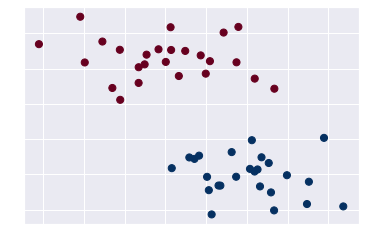

In [6]:
#creating the data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
#plotting the points 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="RdBu")
#for my dark themed notebook
plt.xticks(color="white")
plt.yticks(color="white")

In [20]:
#getting the svc fit 
from sklearn.svm import SVC
clf = SVC(kernel="linear",C=1)
clf.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

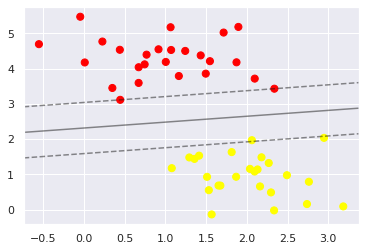

In [21]:
#creating a function to plot the dist between the boundaries 
def plot_svc_decision_function(model,ax=None,plot_support=True):
  """plots the decision func for a 2D SVC"""
  if ax is None:
    ax = plt.gca()  #if the apt axis is not there , create one 
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  #create grid to evaluate the model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)
  # plot decision boundary and margins
  ax.contour(X, Y, P, colors='k',
  levels=[-1, 0, 1], alpha=0.5,
  linestyles=['--', '-', '--'])
  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf);